# Autocorrelation 

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

earthquake = pd.read_csv("Earthquakes.csv")
print(earthquake)

       Year  Quakes  Lag1  Lag2  Lag3  Lag4
0    1916.0     2.0   NaN   NaN   NaN   NaN
1    1917.0     5.0   2.0   NaN   NaN   NaN
2    1918.0    12.0   5.0   2.0   NaN   NaN
3    1919.0     8.0  12.0   5.0   2.0   NaN
4    1920.0     7.0   8.0  12.0   5.0   2.0
..      ...     ...   ...   ...   ...   ...
105  2021.0    19.0   9.0   9.0  17.0   7.0
106     NaN     NaN  19.0   9.0   9.0  17.0
107     NaN     NaN   NaN  19.0   9.0   9.0
108     NaN     NaN   NaN   NaN  19.0   9.0
109     NaN     NaN   NaN   NaN   NaN  19.0

[110 rows x 6 columns]


In [2]:
earthquake.dtypes

Year      float64
Quakes    float64
Lag1      float64
Lag2      float64
Lag3      float64
Lag4      float64
dtype: object

In [3]:
earthquake["Quakes"]=earthquake["Quakes"].astype(float)

## Autocorrelation

One thing we talked about during the lectures is the concept of autocorrelation. We said that one of the assumptions for our calculation of the model parameter's confidence intervals is that the data should be independent. Often engineering is NOT independent as it is gathered in time. One data point is then likely to be correlated with the value before it. We discussed how autocorrelation can be checked using an autocorrelation plot. `Matplotlib` offers a convenient way to plot the autocorrelation function using the `acorr` method. Let's see an example below to test if our z value is autocorrelated. The number of lags to show on the plot can be specified with the `maxlags` argument. Let's show 6 lag values.

Let yt = the annual number of worldwide earthquakes with magnitude greater than 7 on the Richter scale since 2017 years (Earthquakes.csv data obtained from https://earthquake.usgs.gov)

<AxesSubplot:xlabel='Year', ylabel='Quakes'>

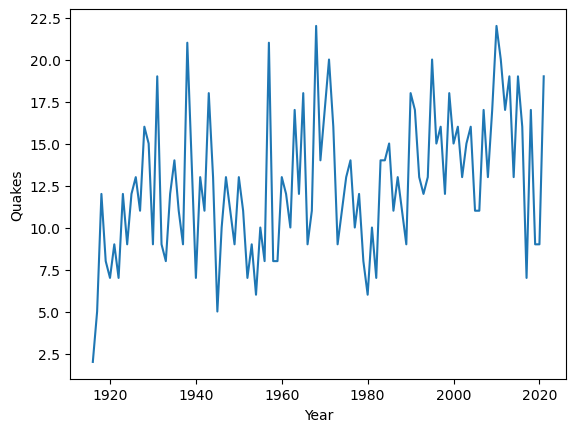

In [4]:
sns.lineplot(x="Year",y="Quakes",data=earthquake)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1=ols('Quakes ~ Lag1',data=earthquake)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.043   
Dependent Variable: Quakes           AIC:                591.5492
Date:               2023-06-26 14:06 BIC:                596.8571
No. Observations:   105              Log-Likelihood:     -293.77 
Df Model:           1                F-statistic:        5.700   
Df Residuals:       103              Prob (F-statistic): 0.0188  
R-squared:          0.052            Scale:              16.072  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    9.9055     1.2436   7.9648   0.0000   7.4390   12.3719
Lag1         0.2244     0.0940   2.3874   0.0188   0.0380    0.4107
-----------------------------------------------------------------
Omnibus:              4.067        Durbin-Watson:           2.071
Prob(Omnibus):   

In [6]:
results1.resid

1     -5.354174
2      0.972755
3     -4.597742
4     -4.700315
5     -2.475958
         ...   
101   -6.495170
102    5.524042
103   -4.719526
104   -2.924672
105    7.075328
Length: 105, dtype: float64

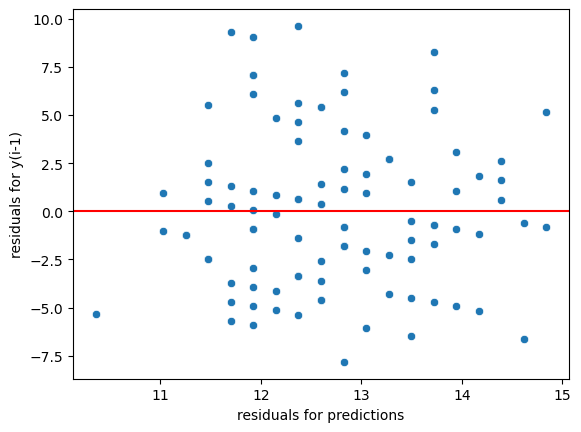

In [7]:
sns.scatterplot(x=results1.predict(),y=results1.resid)
plt.ylabel("residuals for y(i-1)")
plt.xlabel("residuals for predictions")
plt.axhline(0,color="red")

Text(0, 0.5, 'Lag 1')

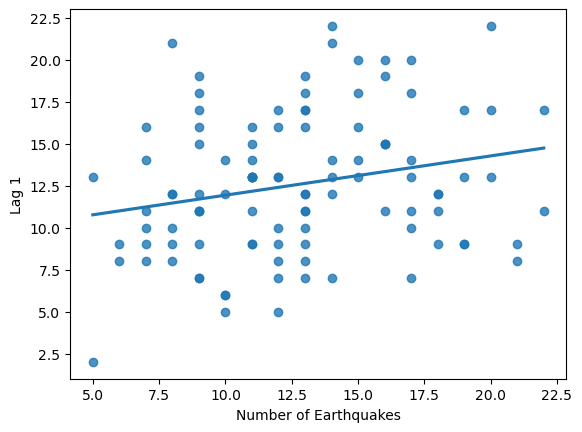

In [8]:
#sns.scatterplot(x="Quakes",y="Lag1",data=earthquake)
sns.regplot(x="Quakes",y="Lag1",data=earthquake,ci=False)
plt.xlabel("Number of Earthquakes")
plt.ylabel("Lag 1")

The resdiuals are independent and there is a linear fit between earthquakes and lag1 of earthquakes, so you could analyze an autoregressive model using lag1 as the predictor.  You can analyze a correlation function plot to see if this is the best lag.

In [9]:
QuakesA=(earthquake['Quakes']-np.mean(earthquake['Quakes']))
QuakesA= QuakesA[~np.isnan(QuakesA)]

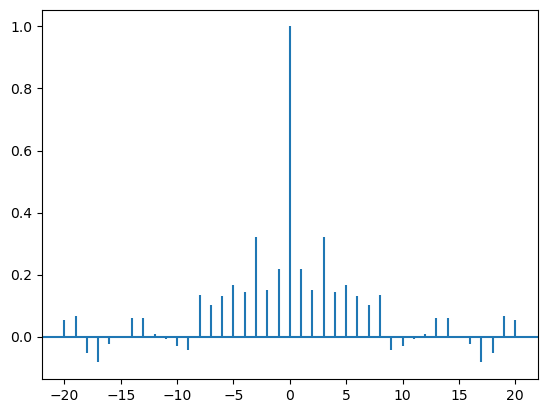

In [10]:
import matplotlib.pyplot as plt
plt.acorr(QuakesA, maxlags=20)
plt.show()

By default `matplotlib` shows two sided autocorrelation plot. We're only interested in the right side so let's change our x-limits on the plot to only show the right side. The x limits of the plot can be specified using the `xlim` option. 

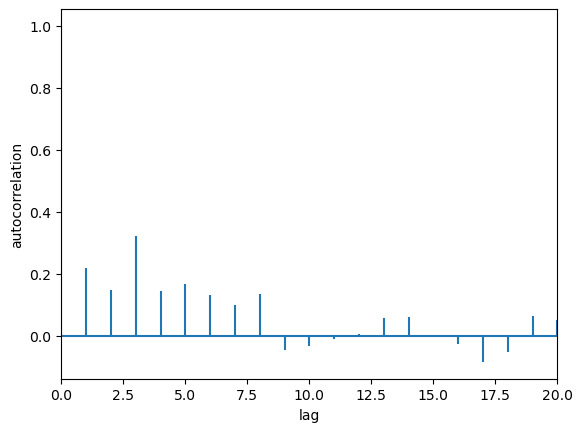

In [11]:
plt.acorr(QuakesA, maxlags=20)
plt.xlim([0,20])
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

In this example the data seems to be autocorrelated. Least Squares regression models are pretty robust to violations of our assumptions. The relationship between the points and the past time series has a strong positive nature. The present time series observation is highly correlated with older time series observations.  

For the autocorrelation correlogram, we will show the degreee of correlation between the observation and the observations own lagged value. This can help to find the autoregression that may be chosen fit the model or to try to fix the autocorrealtion if being used as the response in regression model with exogenous predictors.   

In [12]:
quakes = pd.read_csv("Quakes.csv")
print(quakes)

     Year  Quakes
0    1916       2
1    1917       5
2    1918      12
3    1919       8
4    1920       7
..    ...     ...
101  2017       7
102  2018      17
103  2019       9
104  2020       9
105  2021      19

[106 rows x 2 columns]


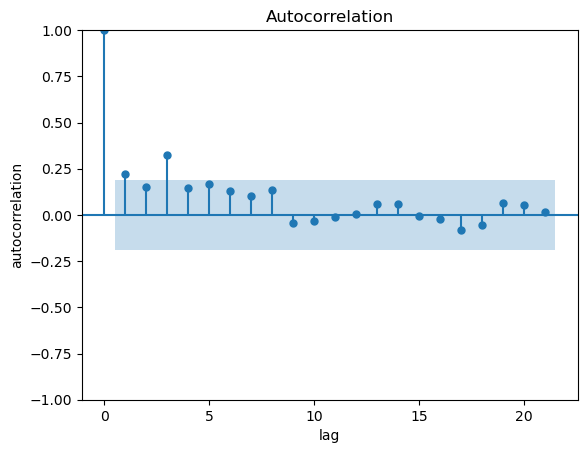

In [13]:
plot_acf(quakes["Quakes"],bartlett_confint=False)
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

In [14]:
earthquakeW = pd.read_csv("Earthquakes.csv")
print(earthquakeW)

       Year  Quakes  Lag1  Lag2  Lag3  Lag4
0    1916.0     2.0   NaN   NaN   NaN   NaN
1    1917.0     5.0   2.0   NaN   NaN   NaN
2    1918.0    12.0   5.0   2.0   NaN   NaN
3    1919.0     8.0  12.0   5.0   2.0   NaN
4    1920.0     7.0   8.0  12.0   5.0   2.0
..      ...     ...   ...   ...   ...   ...
105  2021.0    19.0   9.0   9.0  17.0   7.0
106     NaN     NaN  19.0   9.0   9.0  17.0
107     NaN     NaN   NaN  19.0   9.0   9.0
108     NaN     NaN   NaN   NaN  19.0   9.0
109     NaN     NaN   NaN   NaN   NaN  19.0

[110 rows x 6 columns]


In [15]:
earthquakeW.corr()

,Year,Quakes,Lag1,Lag2,Lag3,Lag4
Year,1.000000,0.394047,0.378663,0.399866,0.421809,0.412385
Quakes,0.394047,1.000000,0.228987,0.159531,0.344766,0.157071
Lag1,0.378663,0.228987,1.000000,0.228987,0.159531,0.344766
Lag2,0.399866,0.159531,0.228987,1.000000,0.228987,0.159531
Lag3,0.421809,0.344766,0.159531,0.228987,1.000000,0.228987
Lag4,0.412385,0.157071,0.344766,0.159531,0.228987,1.000000


It appears that lag1 and lag3 could do to have a linear regression model with the number of earthquakes as the response variable.  If using the lag3, then this is a muultiple linear regression using lag1, lag2, and lag3 as the predictors. 

In [16]:
model2=ols('Quakes ~ Lag1+Lag2+Lag3',data=earthquake)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.114   
Dependent Variable: Quakes           AIC:                572.7046
Date:               2023-06-26 14:07 BIC:                583.2435
No. Observations:   103              Log-Likelihood:     -282.35 
Df Model:           3                F-statistic:        5.370   
Df Residuals:       99               Prob (F-statistic): 0.00182 
R-squared:          0.140            Scale:              14.648  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
Intercept   6.6566     1.7522   3.7989   0.0003    3.1798   10.1334
Lag1        0.1268     0.0973   1.3037   0.1954   -0.0662    0.3198
Lag2        0.0595     0.0973   0.6121   0.5419   -0.1335    0.2526
Lag3        0.2991     0.0939   3.1857   0.0019    0.1128    0.4854
-------------

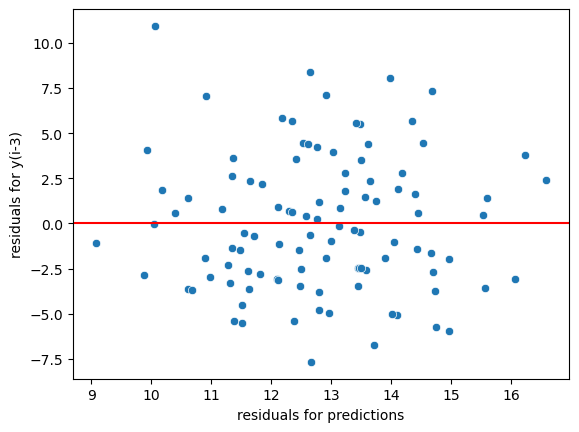

In [23]:
sns.scatterplot(x=results2.predict(),y=results2.resid)
plt.ylabel("residuals for y(i-3)")
plt.xlabel("residuals for predictions")
plt.axhline(0,color="red")

Text(0, 0.5, 'Lag 3')

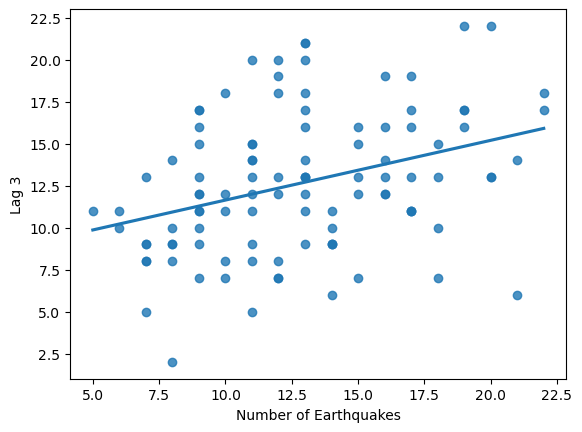

In [20]:
#sns.scatterplot(x="Quakes",y="Lag3",data=earthquake)
sns.regplot(x="Quakes",y="Lag3",data=earthquake,ci=False)
plt.xlabel("Number of Earthquakes")
plt.ylabel("Lag 3")

If you do not want the autocorrelation, then could take every 2nd value to run autocorrelation function plot and see that we could avoid this 

In [21]:
earthquakeW2=quakes["Quakes"]
earthquakeW2
earthquakeW2=earthquakeW2.iloc[::2,]
#earthquakeW2

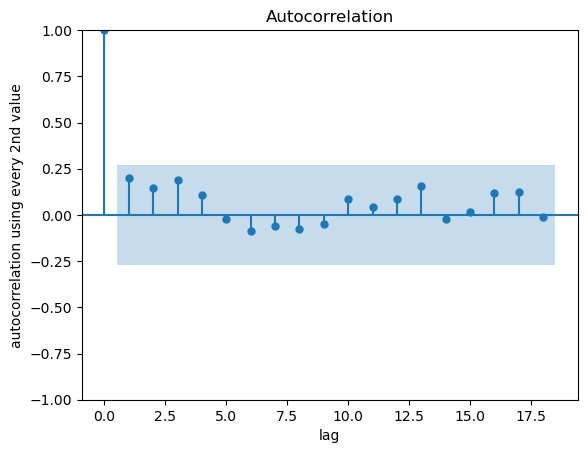

In [22]:
plot_acf(earthquakeW2,bartlett_confint=False)
plt.xlabel("lag")
plt.ylabel("autocorrelation using every 2nd value")
plt.show()